Install pandas package - STRICTLY SPEAKING THIS IS NOT NECESSARY HERE

In [66]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


Import pandas

In [67]:
import pandas as pd

Read the CSV file into a pandas DataFrame

In [68]:
df = pd.read_csv('results.csv')

Display the first few rows of the DataFrame

In [69]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [71]:
import pandas as pd

# Assuming your dataframe is named 'df'
# Filter the dataframe to include matches where Germany played
germany_matches = df[(df['home_team'] == 'Germany') | (df['away_team'] == 'Germany')]

# Find the earliest date
first_germany_match = germany_matches['date'].min()

print("First match Germany played:", first_germany_match)


First match Germany played: 1908-04-05


In [75]:
# Extract unique team names from both home_team and away_team columns
teams_home = df['home_team'].unique()
teams_away = df['away_team'].unique()

# Combine unique team names from both columns
all_teams = set(list(teams_home) + list(teams_away))

# Create a dictionary to store the earliest appearance of each team
earliest_appearances = {}

# Iterate over each team to find its earliest appearance
for team in all_teams:
    team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)]
    earliest_appearance = team_matches['date'].min()
    earliest_appearances[team] = earliest_appearance

# Sort the dictionary by the earliest appearance and extract the first 20 teams
first_20_teams = sorted(earliest_appearances, key=earliest_appearances.get)[:20]

print("First 20 nations to have played international matches:")
for team in first_20_teams:
    print(team, "-", earliest_appearances[team])


First 20 nations to have played international matches:
England - 1872-11-30
Scotland - 1872-11-30
Wales - 1876-03-25
Northern Ireland - 1882-02-18
Canada - 1885-11-28
United States - 1885-11-28
Uruguay - 1902-07-20
Argentina - 1902-07-20
Hungary - 1902-10-12
Austria - 1902-10-12
Czechoslovakia - 1903-04-05
Belgium - 1904-05-01
France - 1904-05-01
Switzerland - 1905-02-12
Guernsey - 1905-04-17
Alderney - 1905-04-17
Jersey - 1905-04-27
Netherlands - 1905-04-30
Germany - 1908-04-05
Norway - 1908-07-12


Some preliminary data analysis

In [70]:
df.dtypes #check data types


date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [22]:
df.describe() #summary statistics for numerical columns.

,home_score,away_score
count,45640.000000,45640.000000
mean,1.747677,1.181836
std,1.756628,1.395057
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [23]:
df.isnull().sum() # Check for missing values

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [24]:
df['tournament'].unique() #Check the unique values in categorical columns

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Muratti Vase', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Peace Cup',
       'Copa Chevallier Boutell', 'Olympic Games', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFC Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip

In [25]:
#number of matches played each year.
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
matches_per_year = df['year'].value_counts().sort_index()
print(matches_per_year)

1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2020     348
2021    1090
2022     923
2023     980
2024     148
Name: year, Length: 153, dtype: int64


In [26]:
avg_home_goals = df['home_score'].mean()
avg_away_goals = df['away_score'].mean()
print(avg_home_goals)
print(avg_away_goals)

1.7476774758983349
1.1818361086765994


In [27]:
tournament_counts = df['tournament'].value_counts().head(10)
print(tournament_counts)

Friendly                                17818
FIFA World Cup qualification             8013
UEFA Euro qualification                  2815
African Cup of Nations qualification     2116
FIFA World Cup                            964
Copa América                              841
African Cup of Nations                    793
AFC Asian Cup qualification               764
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Name: tournament, dtype: int64


In [28]:
# Calculate goal difference
df['goal_difference'] = df['home_score'] - df['away_score']

# Display the DataFrame with goal difference
print(df[['home_team', 'away_team', 'home_score', 'away_score', 'goal_difference']])


          home_team     away_team  home_score  away_score  goal_difference
0          Scotland       England           0           0                0
1           England      Scotland           4           2                2
2          Scotland       England           2           1                1
3           England      Scotland           2           2                0
4          Scotland       England           3           0                3
...             ...           ...         ...         ...              ...
45635   Ivory Coast      DR Congo           1           0                1
45636       Nigeria  South Africa           1           1                0
45637         Qatar        Jordan           3           1                2
45638  South Africa      DR Congo           0           0                0
45639   Ivory Coast       Nigeria           2           1                1

[45640 rows x 5 columns]


In [29]:
# Function to determine winning team or draw
def determine_winner(home_score, away_score):
    if home_score > away_score:
        return 'Home'
    elif away_score > home_score:
        return 'Away'
    else:
        return 'Draw'

# Apply the function to each row to create a new column
df['winning_team'] = df.apply(lambda row: determine_winner(row['home_score'], row['away_score']), axis=1)

# Display the DataFrame with winning team information
print(df[['home_team', 'away_team', 'home_score', 'away_score', 'winning_team']])

          home_team     away_team  home_score  away_score winning_team
0          Scotland       England           0           0         Draw
1           England      Scotland           4           2         Home
2          Scotland       England           2           1         Home
3           England      Scotland           2           2         Draw
4          Scotland       England           3           0         Home
...             ...           ...         ...         ...          ...
45635   Ivory Coast      DR Congo           1           0         Home
45636       Nigeria  South Africa           1           1         Draw
45637         Qatar        Jordan           3           1         Home
45638  South Africa      DR Congo           0           0         Draw
45639   Ivory Coast       Nigeria           2           1         Home

[45640 rows x 5 columns]


In [30]:
# Calculate value counts of winning teams
winning_team_counts = df['winning_team'].value_counts()

# Calculate percentages
winning_team_percentages = (winning_team_counts / len(df)) * 100

# Display percentages
print(winning_team_percentages)

Home    48.805872
Away    28.315074
Draw    22.879053
Name: winning_team, dtype: float64


In [31]:
# Filter out matches where the home team has the true home advantage
true_home_matches = df[df['neutral'] == False]

# Calculate value counts of winning teams for true home matches
true_home_winning_counts = true_home_matches['winning_team'].value_counts()

# Calculate percentages for true home matches
true_home_winning_percentages = (true_home_winning_counts / len(true_home_matches)) * 100

# Display percentages
print(true_home_winning_percentages)


Home    50.648137
Away    26.433493
Draw    22.918370
Name: winning_team, dtype: float64


In [35]:
import pandas as pd

# Calculate team statistics
team_statistics = {}

# Iterate through each match
for index, match in df.iterrows():
    home_team = match['home_team']
    away_team = match['away_team']
    home_score = match['home_score']
    away_score = match['away_score']
    winner = match['winning_team']
    
    # Update home team statistics
    if home_team not in team_statistics:
        team_statistics[home_team] = {'Wins': 0, 'Draws': 0, 'Losses': 0, 'Goals Scored': 0, 'Goals Conceded': 0}
    if winner == 'Home':
        team_statistics[home_team]['Wins'] += 1
    elif winner == 'Draw':
        team_statistics[home_team]['Draws'] += 1
    else:
        team_statistics[home_team]['Losses'] += 1
    team_statistics[home_team]['Goals Scored'] += home_score
    team_statistics[home_team]['Goals Conceded'] += away_score
    
    # Update away team statistics
    if away_team not in team_statistics:
        team_statistics[away_team] = {'Wins': 0, 'Draws': 0, 'Losses': 0, 'Goals Scored': 0, 'Goals Conceded': 0}
    if winner == 'Away':
        team_statistics[away_team]['Wins'] += 1
    elif winner == 'Draw':
        team_statistics[away_team]['Draws'] += 1
    else:
        team_statistics[away_team]['Losses'] += 1
    team_statistics[away_team]['Goals Scored'] += away_score
    team_statistics[away_team]['Goals Conceded'] += home_score

# Convert team statistics to DataFrame
team_df = pd.DataFrame(team_statistics).transpose()

# Calculate additional metrics
team_df['Total Matches'] = team_df['Wins'] + team_df['Draws'] + team_df['Losses']
team_df['Win Ratio'] = team_df['Wins'] / team_df['Total Matches']
team_df['Draw Ratio'] = team_df['Draws'] / team_df['Total Matches']
team_df['Loss Ratio'] = team_df['Losses'] / team_df['Total Matches']

# Sort DataFrame by wins (descending order) to find most successful teams
most_successful_teams = team_df.sort_values(by='Wins', ascending=False)

# Display most successful teams
print(most_successful_teams[['Wins', 'Draws', 'Losses', 'Goals Scored', 'Goals Conceded', 'Win Ratio', 'Draw Ratio', 'Loss Ratio']])


              Wins  Draws  Losses  Goals Scored  Goals Conceded  Win Ratio  \
Brazil         659    207     166          2256             928   0.638566   
England        605    253     201          2321            1023   0.571294   
Germany        578    208     213          2233            1164   0.578579   
Argentina      567    254     216          1957            1061   0.546770   
Sweden         529    229     313          2107            1368   0.493931   
...            ...    ...     ...           ...             ...        ...   
Vatican City     0      3       4             4              17   0.000000   
Ryūkyū           0      0       1             0               9   0.000000   
Manchukuo        0      0       3             0              16   0.000000   
Mayotte          0      4       3             6              11   0.000000   
Kiribati         0      1      10             7             126   0.000000   

              Draw Ratio  Loss Ratio  
Brazil          0.200581

In [36]:
import pandas as pd

# Filter matches played since 1945
df_since_1945 = df[pd.to_datetime(df['date']).dt.year >= 1945]

# Calculate team statistics
team_statistics = {}

# Iterate through each match since 1945
for index, match in df_since_1945.iterrows():
    home_team = match['home_team']
    away_team = match['away_team']
    home_score = match['home_score']
    away_score = match['away_score']
    winner = match['winning_team']
    
    # Update home team statistics
    if home_team not in team_statistics:
        team_statistics[home_team] = {'Wins': 0, 'Draws': 0, 'Losses': 0, 'Goals Scored': 0, 'Goals Conceded': 0}
    if winner == 'Home':
        team_statistics[home_team]['Wins'] += 1
    elif winner == 'Draw':
        team_statistics[home_team]['Draws'] += 1
    else:
        team_statistics[home_team]['Losses'] += 1
    team_statistics[home_team]['Goals Scored'] += home_score
    team_statistics[home_team]['Goals Conceded'] += away_score
    
    # Update away team statistics
    if away_team not in team_statistics:
        team_statistics[away_team] = {'Wins': 0, 'Draws': 0, 'Losses': 0, 'Goals Scored': 0, 'Goals Conceded': 0}
    if winner == 'Away':
        team_statistics[away_team]['Wins'] += 1
    elif winner == 'Draw':
        team_statistics[away_team]['Draws'] += 1
    else:
        team_statistics[away_team]['Losses'] += 1
    team_statistics[away_team]['Goals Scored'] += away_score
    team_statistics[away_team]['Goals Conceded'] += home_score

# Convert team statistics to DataFrame
team_df = pd.DataFrame(team_statistics).transpose()

# Calculate additional metrics
team_df['Total Matches'] = team_df['Wins'] + team_df['Draws'] + team_df['Losses']
team_df['Win Ratio'] = team_df['Wins'] / team_df['Total Matches']
team_df['Draw Ratio'] = team_df['Draws'] / team_df['Total Matches']
team_df['Loss Ratio'] = team_df['Losses'] / team_df['Total Matches']

# Sort DataFrame by wins (descending order) to find most successful teams
most_successful_teams = team_df.sort_values(by='Wins', ascending=False)

# Display most successful teams
print(most_successful_teams[['Wins', 'Draws', 'Losses', 'Goals Scored', 'Goals Conceded', 'Win Ratio', 'Draw Ratio', 'Loss Ratio']])


             Wins  Draws  Losses  Goals Scored  Goals Conceded  Win Ratio  \
Brazil        623    194     138          2095             789   0.652356   
South Korea   486    239     197          1615             832   0.527115   
Germany       480    174     156          1736             830   0.592593   
Mexico        476    219     238          1609             944   0.510182   
England       468    216     150          1650             730   0.561151   
...           ...    ...     ...           ...             ...        ...   
Găgăuzia        0      1       2             2               9   0.000000   
Cilento         0      0       1             0               2   0.000000   
Darfur          0      0       7             1              99   0.000000   
Madrid          0      0       1             1               2   0.000000   
Tibet           0      2      14            14              66   0.000000   

             Draw Ratio  Loss Ratio  
Brazil         0.203141    0.144503  

In [43]:
import pandas as pd

# Filter matches played since 1955
df_since_1955 = df[pd.to_datetime(df['date']).dt.year >= 1955]

# Calculate team statistics
team_statistics = {}

# Iterate through each match since 1955
for index, match in df_since_1955.iterrows():
    home_team = match['home_team']
    away_team = match['away_team']
    home_score = match['home_score']
    away_score = match['away_score']
    winner = match['winning_team']
    
    # Update home team statistics
    if home_team not in team_statistics:
        team_statistics[home_team] = {'Wins': 0, 'Draws': 0, 'Losses': 0, 'Goals Scored': 0, 'Goals Conceded': 0, 'Total Matches': 0}
    if winner == 'Home':
        team_statistics[home_team]['Wins'] += 1
    elif winner == 'Draw':
        team_statistics[home_team]['Draws'] += 1
    else:
        team_statistics[home_team]['Losses'] += 1
    team_statistics[home_team]['Goals Scored'] += home_score
    team_statistics[home_team]['Goals Conceded'] += away_score
    team_statistics[home_team]['Total Matches'] += 1
    
    # Update away team statistics
    if away_team not in team_statistics:
        team_statistics[away_team] = {'Wins': 0, 'Draws': 0, 'Losses': 0, 'Goals Scored': 0, 'Goals Conceded': 0, 'Total Matches': 0}
    if winner == 'Away':
        team_statistics[away_team]['Wins'] += 1
    elif winner == 'Draw':
        team_statistics[away_team]['Draws'] += 1
    else:
        team_statistics[away_team]['Losses'] += 1
    team_statistics[away_team]['Goals Scored'] += away_score
    team_statistics[away_team]['Goals Conceded'] += home_score
    team_statistics[away_team]['Total Matches'] += 1

# Convert team statistics to DataFrame
team_df = pd.DataFrame(team_statistics).transpose()

# Filter out teams with less than 500 matches
team_df = team_df[team_df['Total Matches'] >= 500]

# Calculate additional metrics
team_df['Win Ratio'] = team_df['Wins'] / team_df['Total Matches']
team_df['Draw Ratio'] = team_df['Draws'] / team_df['Total Matches']
team_df['Loss Ratio'] = team_df['Losses'] / team_df['Total Matches']

# Sort DataFrame by win ratio (descending order) to find most successful teams
most_successful_teams = team_df.sort_values(by='Win Ratio', ascending=False)

# Display most successful teams
print(most_successful_teams[['Wins', 'Draws', 'Losses', 'Goals Scored', 'Goals Conceded', 'Total Matches', 'Win Ratio', 'Draw Ratio', 'Loss Ratio']])


             Wins  Draws  Losses  Goals Scored  Goals Conceded  Total Matches  \
Brazil        586    187     126          1916             720            899   
Spain         385    151     115          1284             542            651   
Germany       461    171     149          1657             786            781   
Iran          303    132     102          1016             423            537   
England       423    202     133          1445             621            758   
...           ...    ...     ...           ...             ...            ...   
Peru          191    152     262           697             842            605   
El Salvador   166    124     239           598             754            529   
Singapore     177    111     292           760            1081            580   
Finland       170    138     311           656            1063            619   
Tanzania      151    164     239           612             807            554   

             Win Ratio  Dra

In [44]:
# Display only the top 20 most successful teams
top_20_teams = most_successful_teams.head(20)
print(top_20_teams[['Wins', 'Draws', 'Losses', 'Goals Scored', 'Goals Conceded', 'Total Matches', 'Win Ratio', 'Draw Ratio', 'Loss Ratio']])


              Wins  Draws  Losses  Goals Scored  Goals Conceded  \
Brazil         586    187     126          1916             720   
Spain          385    151     115          1284             542   
Germany        461    171     149          1657             786   
Iran           303    132     102          1016             423   
England        423    202     133          1445             621   
France         376    161     146          1231             643   
Netherlands    354    151     144          1291             615   
Argentina      416    205     158          1369             758   
Italy          356    194     123          1084             557   
South Korea    479    236     191          1580             788   
Portugal       310    136     142          1050             570   
Russia         365    187     159          1220             664   
Mexico         465    219     229          1556             908   
Egypt          344    168     170          1096             65

In [46]:
import pandas as pd

# Filter World Cup matches
world_cup_matches = df[df['tournament'] == 'FIFA World Cup']

# Calculate team statistics
team_statistics = {}

# Iterate through each World Cup match
for index, match in world_cup_matches.iterrows():
    home_team = match['home_team']
    away_team = match['away_team']
    home_score = match['home_score']
    away_score = match['away_score']
    winner = match['winning_team']
    
    # Update home team statistics
    if home_team not in team_statistics:
        team_statistics[home_team] = {'Wins': 0, 'Draws': 0, 'Losses': 0, 'Goals Scored': 0, 'Goals Conceded': 0, 'Total Matches': 0}
    if winner == 'Home':
        team_statistics[home_team]['Wins'] += 1
    elif winner == 'Draw':
        team_statistics[home_team]['Draws'] += 1
    else:
        team_statistics[home_team]['Losses'] += 1
    team_statistics[home_team]['Goals Scored'] += home_score
    team_statistics[home_team]['Goals Conceded'] += away_score
    team_statistics[home_team]['Total Matches'] += 1
    
    # Update away team statistics
    if away_team not in team_statistics:
        team_statistics[away_team] = {'Wins': 0, 'Draws': 0, 'Losses': 0, 'Goals Scored': 0, 'Goals Conceded': 0, 'Total Matches': 0}
    if winner == 'Away':
        team_statistics[away_team]['Wins'] += 1
    elif winner == 'Draw':
        team_statistics[away_team]['Draws'] += 1
    else:
        team_statistics[away_team]['Losses'] += 1
    team_statistics[away_team]['Goals Scored'] += away_score
    team_statistics[away_team]['Goals Conceded'] += home_score
    team_statistics[away_team]['Total Matches'] += 1

# Convert team statistics to DataFrame
team_df = pd.DataFrame(team_statistics).transpose()

# Calculate additional metrics
team_df['Win Ratio'] = team_df['Wins'] / team_df['Total Matches']
team_df['Draw Ratio'] = team_df['Draws'] / team_df['Total Matches']
team_df['Loss Ratio'] = team_df['Losses'] / team_df['Total Matches']

# Sort DataFrame by win ratio (descending order) to find most successful teams
most_successful_teams_world_cup = team_df.sort_values(by='Win Ratio', ascending=False)

# Display only the top 20 most successful World Cup teams
top_20_teams_world_cup = most_successful_teams_world_cup.head(20)
print(top_20_teams_world_cup[['Wins', 'Draws', 'Losses', 'Goals Scored', 'Goals Conceded', 'Total Matches', 'Win Ratio', 'Draw Ratio', 'Loss Ratio']])


             Wins  Draws  Losses  Goals Scored  Goals Conceded  Total Matches  \
Brazil         76     19      19           237             108            114   
Germany        68     21      23           232             130            112   
Netherlands    30     14      11            96              52             55   
Italy          45     21      17           128              77             83   
France         39     14      20           136              85             73   
Argentina      47     17      24           152             101             88   
Turkey          5      1       4            20              17             10   
Portugal       17      6      12            61              41             35   
Hungary        15      3      14            87              57             32   
Spain          31     17      19           108              75             67   
Poland         17      6      15            49              50             38   
Croatia        13      8    

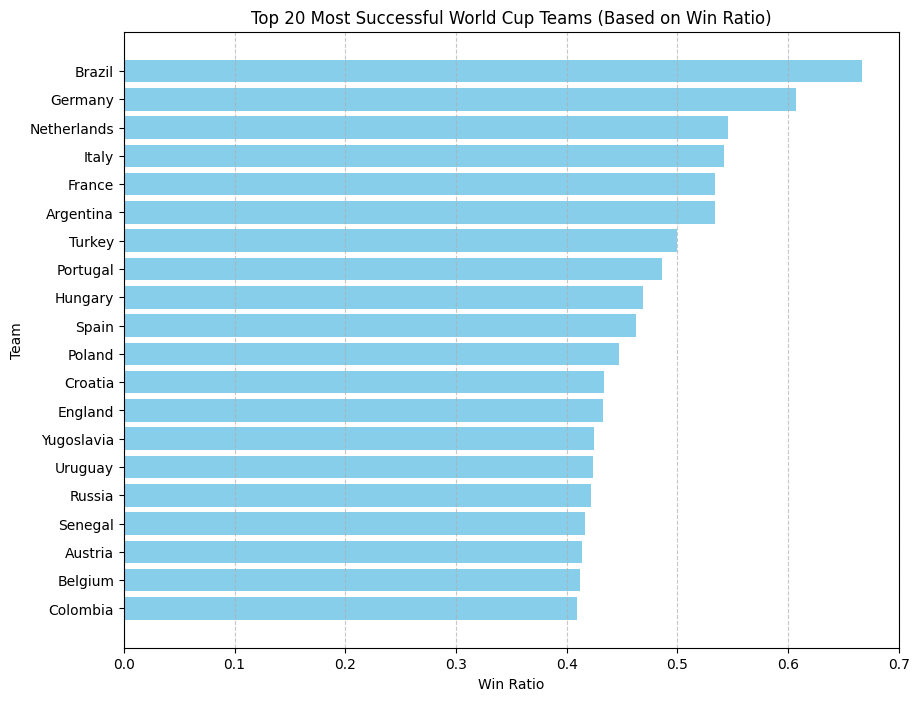

In [47]:
import matplotlib.pyplot as plt

# Top 20 most successful World Cup teams
top_20_teams_world_cup = most_successful_teams_world_cup.head(20)

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_20_teams_world_cup.index, top_20_teams_world_cup['Win Ratio'], color='skyblue')
plt.xlabel('Win Ratio')
plt.ylabel('Team')
plt.title('Top 20 Most Successful World Cup Teams (Based on Win Ratio)')
plt.gca().invert_yaxis()  # Invert y-axis to display highest win ratio at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



In [60]:
# Calculate total matches played by each team
total_matches = df['home_team'].value_counts() + df['away_team'].value_counts()

# Filter out teams that have played less than 100 matches overall
teams_over_100_matches = total_matches[total_matches >= 500].index

# Filter the original DataFrame based on teams that have played more than 100 matches
df_filtered = df[df['home_team'].isin(teams_over_100_matches) & df['away_team'].isin(teams_over_100_matches)]

# Concatenate home and away matches for each team
matches_by_team = pd.concat([df_filtered['home_team'], df_filtered['away_team']])

# Calculate total matches won by each team
total_matches_won = matches_by_team.value_counts()

# Calculate total matches played by each team
total_matches_played = total_matches.loc[total_matches_won.index]

# Calculate the percentage of total matches won by each team
percentage_won = (total_matches_won / total_matches_played).sort_values(ascending=False)

# Select the top 10 teams based on the percentage of total matches won
top_10_teams_percentage_won = percentage_won.head(10)

# Print the top 10 teams
print(top_10_teams_percentage_won)


Argentina    0.927676
Paraguay     0.918206
Uruguay      0.908316
Peru         0.902985
Brazil       0.902132
Chile        0.900867
Ecuador      0.889483
Colombia     0.888889
Bolivia      0.866534
England      0.865911
dtype: float64


In [64]:
# Filter matches played since 1950
df_since_1950 = df[pd.to_datetime(df['date']).dt.year >= 1950]

# Calculate total matches played by each team
total_matches = df_since_1950['home_team'].value_counts() + df_since_1950['away_team'].value_counts()

# Filter out teams that have played less than 500 matches overall
teams_over_500_matches = total_matches[total_matches >= 500].index

# Filter the original DataFrame based on teams that have played more than 500 matches since 1950
df_filtered = df_since_1950[df_since_1950['home_team'].isin(teams_over_500_matches) & df_since_1950['away_team'].isin(teams_over_500_matches)]

# Concatenate home and away matches for each team
matches_by_team = pd.concat([df_filtered['home_team'], df_filtered['away_team']])

# Calculate total matches won by each team
total_matches_won = matches_by_team.value_counts()

# Calculate total matches played by each team
total_matches_played = total_matches.loc[total_matches_won.index]

# Calculate the percentage of total matches won by each team
percentage_won = (total_matches_won / total_matches_played).sort_values(ascending=False)

# Select the top 10 teams based on the percentage of total matches won
top_10_teams_percentage_won = percentage_won.head(10)

# Print the top 10 teams
print(top_10_teams_percentage_won)


Argentina    0.848101
Brazil       0.845905
Colombia     0.833333
Chile        0.818436
Uruguay      0.816783
Peru         0.811290
England      0.807259
Ecuador      0.806513
Paraguay     0.788432
Germany      0.779012
dtype: float64


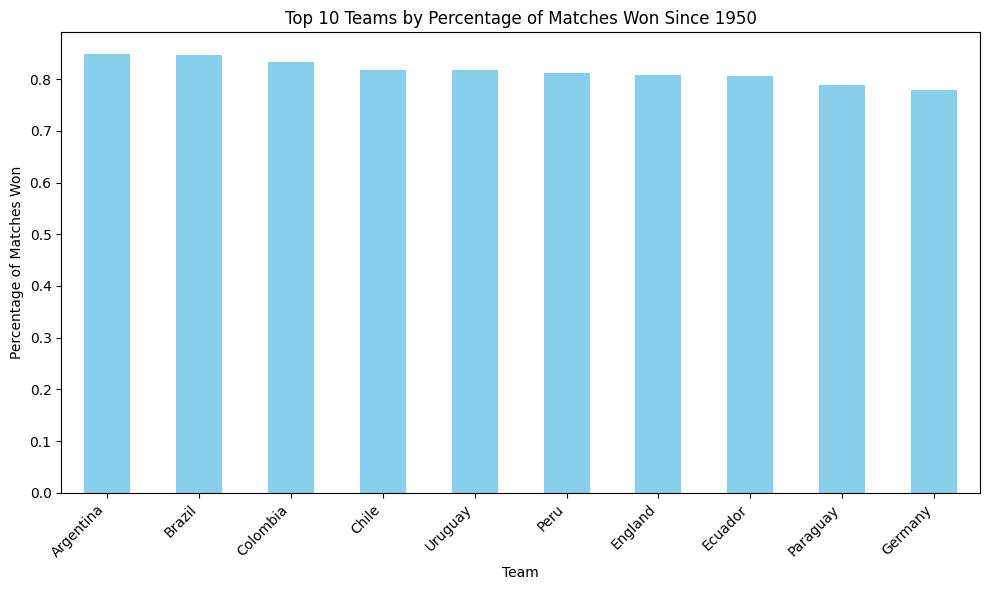

In [65]:
import matplotlib.pyplot as plt

# Plotting the top 10 teams based on percentage of matches won since 1950
plt.figure(figsize=(10, 6))
top_10_teams_percentage_won.plot(kind='bar', color='skyblue')
plt.title('Top 10 Teams by Percentage of Matches Won Since 1950')
plt.xlabel('Team')
plt.ylabel('Percentage of Matches Won')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
